**PROBLEM** : Classification of corrosion severity levels. By utilizing different Machine Learning algorithms and their hyperparameter optimization to present the best performing moddel.



Sanaullah Shah       Data Science     iamkadhimi@gmail.com     Pakistan        NUST, Islamabad

# **Corrosion Classification**

In [241]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
import warnings
warnings.filterwarnings('ignore','warn')

In [189]:
df = pd.read_csv('/kaggle/input/corr-data/MLDataCSV.csv')
df.head()

,Sample#,Target,Weight before[g],Weight After[g],Weight Loss[g],%Weight Loss,Thickness Before [mm],Thickness After[mm],Thickness Loss[mm],% Thickness Loss,Time(hrs),Surface Area[L*W]
0,1,A,75.00,72.92,2.08,2.773333,6.20,5.99,0.21,3.387097,1,2.25
1,2,A,74.37,72.14,2.23,2.998521,6.25,6.01,0.24,3.840000,1,2.25
2,3,A,66.70,64.56,2.14,3.208396,6.12,5.97,0.15,2.450980,1,2.25
3,4,A,67.68,64.83,2.85,4.210993,6.08,5.94,0.14,2.302632,1,2.25
4,5,A,64.51,62.35,2.16,3.348318,6.14,5.93,0.21,3.420195,1,2.25


In [190]:
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

In [191]:
df.columns

Index(['Sample#', 'Target', 'Weight before_g_', 'Weight After_g_',
       'Weight Loss_g_', '%Weight Loss', 'Thickness Before _mm_',
       'Thickness After_mm_ ', 'Thickness Loss_mm_', '% Thickness Loss',
       'Time(hrs)', 'Surface Area_L*W_'],
      dtype='object')

In [192]:
X = df[['Weight Loss_g_','%Weight Loss','Thickness Loss_mm_','% Thickness Loss','Time(hrs)']]

In [193]:
y = df['Target']

In [195]:
X.head()

,Weight Loss_g_,%Weight Loss,Thickness Loss_mm_,% Thickness Loss,Time(hrs)
0,2.08,2.773333,0.21,3.387097,1
1,2.23,2.998521,0.24,3.840000,1
2,2.14,3.208396,0.15,2.450980,1
3,2.85,4.210993,0.14,2.302632,1
4,2.16,3.348318,0.21,3.420195,1


# Feature Engineering Through Random Forests

In [196]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_Train, y_Train)

RandomForestClassifier(random_state=0)

In [197]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_Train.columns).sort_values(ascending=False)

feature_scores

% Thickness Loss      0.276209
Weight Loss[g]        0.256061
Thickness Loss[mm]    0.234220
%Weight Loss          0.233509
dtype: float64

/tmp/ipykernel_32/1988848636.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', size=10)


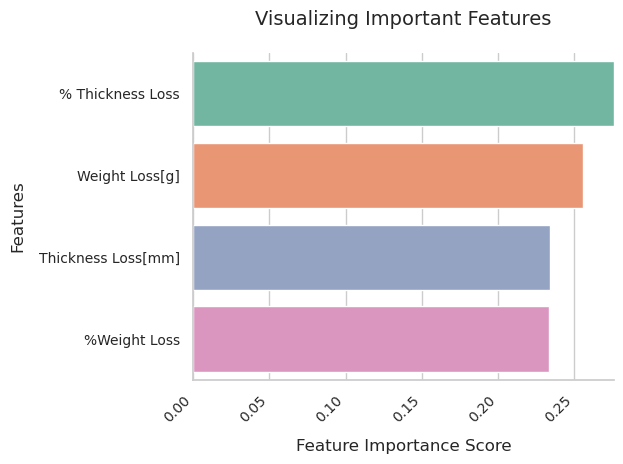

In [198]:
# Set the style and color palette
sns.set(style="whitegrid", palette="Set2")

# Create the bar plot
ax = sns.barplot(x=feature_scores, y=feature_scores.index)

# Set the labels and title
ax.set_xlabel('Feature Importance Score', fontsize=12, labelpad=10)
ax.set_ylabel('Features', fontsize=12, labelpad=10)
ax.set_title("Visualizing Important Features", fontsize=14, pad=20)

# Customize the tick labels and axis limits
ax.set_yticklabels(ax.get_yticklabels(), size=10)
ax.set_xlim(0, max(feature_scores))

# Rotate and align the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', size=10)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width() + 0.1, p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(2, 0), textcoords='offset points', size=10)

# Remove the top and right spines
sns.despine()

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()

# Random Forest Classifier 

In [199]:
from sklearn.model_selection import train_test_split
X_Train, X_Test,y_Train,y_Test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [200]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set

rfc_100.fit(X_Train, y_Train)

# Predict on the test set results

y_pred_100 = rfc_100.predict(X_Test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'.format(accuracy_score(y_Test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8667


In [202]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_Test, y_pred_100)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4 0 0 0]
 [0 2 0 0]
 [0 0 3 2]
 [0 0 0 4]]


In [203]:
from sklearn.metrics import classification_report

print(classification_report(y_Test, y_pred_100))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         4
           B       1.00      1.00      1.00         2
           C       1.00      0.60      0.75         5
           D       0.67      1.00      0.80         4

    accuracy                           0.87        15
   macro avg       0.92      0.90      0.89        15
weighted avg       0.91      0.87      0.86        15



In [204]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, X, y, cv= 10)

In [205]:
score

array([0.8 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.75])

In [206]:
score.mean()

0.9550000000000001

# XGBOOST

In [213]:
Xg = df[['Weight Loss_g_','%Weight Loss','Thickness Loss_mm_','% Thickness Loss','Time(hrs)']]

In [214]:
yg = df['Target']

In [215]:
yg.unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [217]:
from sklearn.model_selection import train_test_split

Xg_train, Xg_test, yg_train, yg_test = train_test_split(Xg, yg, test_size = 0.2, random_state = 0)

In [229]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(yg_train)

In [232]:
unique_classes = np.unique(y_encoded)
print(unique_classes)

[0 1 2 3]


### Hyperparameter Optimization

In [233]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [234]:
# declare parameters
params = {
    'max_depth': [3,4,5,6,8,10,12,15],
    'learning_rate': [0.1,.2,.25,.3],
    'n_estimators': [10,25,50,100],
    'gamma': [0.0,0.1,0.2,0.3,0.4]
                      }     


In [235]:
classifier = xgboost.XGBClassifier()

In [249]:
ran_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=20,scoring= 'accuracy',n_jobs=-1,cv=3,verbose=3)

In [250]:
ran_search.fit(Xg_train,y_encoded)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.1, 0.2, 0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'n_estimators': [10, 25, 50, 100]},
                   scoring='accuracy', verbose=3)

In [251]:
ran_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [254]:
ran_search.best_params_

{'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.25, 'gamma': 0.0}

In [257]:
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the classifier 
xgb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=.25 ,max_depth=10).fit(Xg_train,y_encoded)

[CV 3/3] END gamma=0.0, learning_rate=0.25, max_depth=10, n_estimators=100;, score=0.833 total time=   0.0s
[CV 3/3] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.833 total time=   0.0s
[CV 3/3] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=100;, score=0.833 total time=   0.0s
[CV 1/3] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.846 total time=   0.0s
[CV 3/3] END gamma=0.4, learning_rate=0.1, max_depth=8, n_estimators=10;, score=0.833 total time=   0.0s
[CV 1/3] END gamma=0.3, learning_rate=0.25, max_depth=5, n_estimators=25;, score=0.846 total time=   0.0s
[CV 3/3] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=100;, score=0.833 total time=   0.0s
[CV 1/3] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=10;, score=0.846 total time=   0.0s
[CV 2/3] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/3] END gamma=0.3, learning_rate=0.1, max_de

In [262]:
y_pred = xgb_clf.predict(Xg_test)

In [265]:
y_pred

array([2, 0, 2, 2, 2, 3, 2, 3, 0, 0])

In [268]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb_clf, Xg, yg, cv= 10)

In [269]:
score

array([1. , 1. , 0.8, 1. , 1. , 0.8, 1. , 1. , 1. , 1. ])

In [270]:
score.mean()

0.96

In [274]:
import joblib

joblib.dump(xgb_clf, 'xgb_model.joblib')

['xgb_model.joblib']

In [278]:
import pickle

# Save the trained model to a file
with open('xgbmodel.sav', 'wb') as f:
    pickle.dump(xgb_clf, f)

In [281]:
# Load the saved model from file
loaded_model = pickle.load(open('xgbmodel.sav', 'rb'))

# Fin